# DSCI 303 – Project 03
### Adam Eccles

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In Part A I will create and test a function thaty generates sequences of simulated daily stock prices

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc=rate / 252, scale=vol / (252**0.5), size=days)
    
    cumulative_yields = np.cumsum(daily_yields)
    
    daily_multipliers = np.exp(cumulative_yields)

    sim_prices = np.round(start * daily_multipliers, 2)

    all_prices = np.concatenate(([start], sim_prices))

    return all_prices

Testing the simulate_stock function

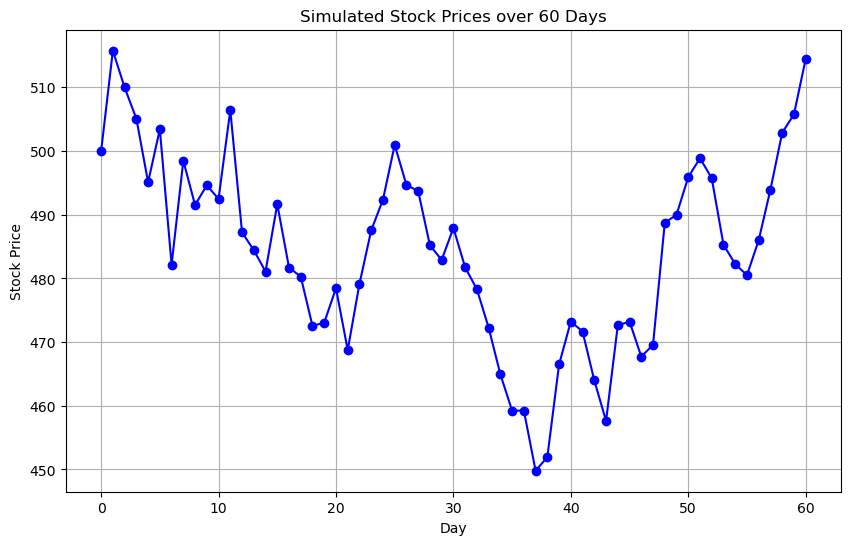

514.44

In [3]:
np.random.seed(1)

simulated_prices = simulate_stock(start=500, rate=0.08, vol=0.3, days=60)

plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, marker='o', linestyle='-', color='b')
plt.title('Simulated Stock Prices over 60 Days')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

simulated_prices[-1]


## Part B: Annual Yield Function
In this section, I will create and test a function that takes a simulated run as its input, and calculates the annual yield during for that particular run.

In [4]:
def find_yield(run):
    int_price = run[0]
    fin_price = run[-1]
    
    annual_yield =  math.log(fin_price/int_price) * 252 / (len(run)-1)

    return round(annual_yield, 4)

I am now going to test my function by running it on the previously simulated run.

In [5]:
find_yield(simulated_prices)

0.1196

The next cell will explore the potential variability in my simulated runs by creating and plotting 25 simulated runs.

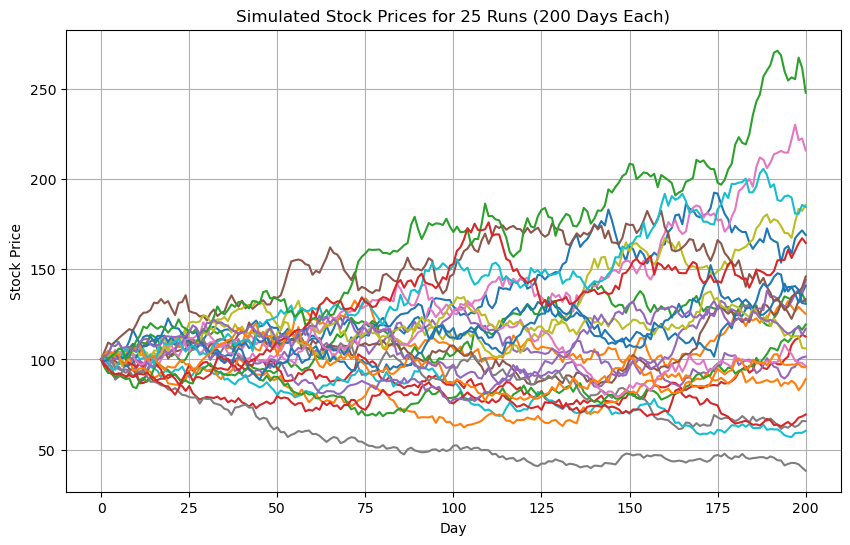

In [6]:
start_price = 100
rate_of = 0.06
volatility = 0.4
days_of = 200

annual_yields = []

plt.figure(figsize=(10, 6))

for i in range(25):
    run = simulate_stock(start=start_price, rate=rate_of, vol=volatility, days=days_of)
    
    yield_value = find_yield(run)
    annual_yields.append(yield_value)
    
    plt.plot(run)

plt.title('Simulated Stock Prices for 25 Runs (200 Days Each)')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

The next cell will display the yields for the 25 simulated runs.

In [7]:
print(annual_yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
In this section I am going to experiment with different seeds to see how they can affect the outcomes of the data.

In the cell below, Stock A has the highest simulated final price.

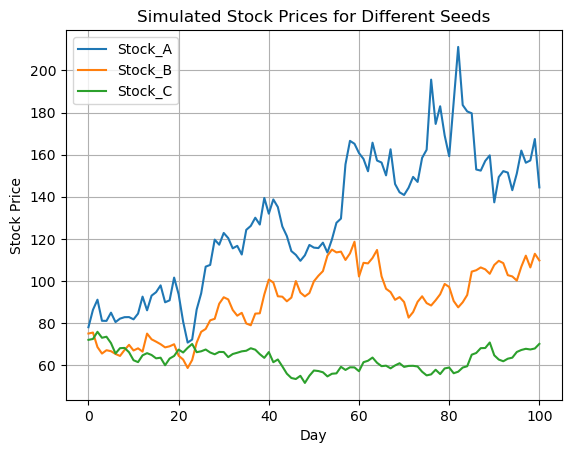

In [19]:
Stock_A = simulate_stock(78, 0.04, 1.2, 100)
Stock_B = simulate_stock(75, 0.08, 0.8, 100)
Stock_C = simulate_stock(72, 0.16, 0.6, 100)

np.random.seed(10)

plt.plot(Stock_A, label = "Stock_A")
plt.plot(Stock_B, label = "Stock_B")
plt.plot(Stock_C, label = "Stock_C")

plt.title('Simulated Stock Prices for Different Seeds')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)

plt.legend(loc='upper left')
plt.show()


In the cell below, Stock B has the highest simulated final price.

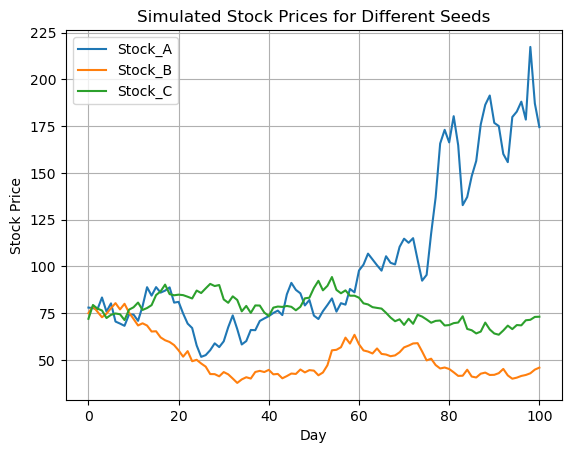

In [23]:
Stock_A = simulate_stock(78, 0.04, 1.2, 100)
Stock_B = simulate_stock(75, 0.08, 0.8, 100)
Stock_C = simulate_stock(72, 0.16, 0.6, 100)

np.random.seed(21)

plt.plot(Stock_A, label = "Stock_A")
plt.plot(Stock_B, label = "Stock_B")
plt.plot(Stock_C, label = "Stock_C")

plt.title('Simulated Stock Prices for Different Seeds')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)

plt.legend(loc='upper left')
plt.show()

In the cell below, Stock C has the highest simulated final price.

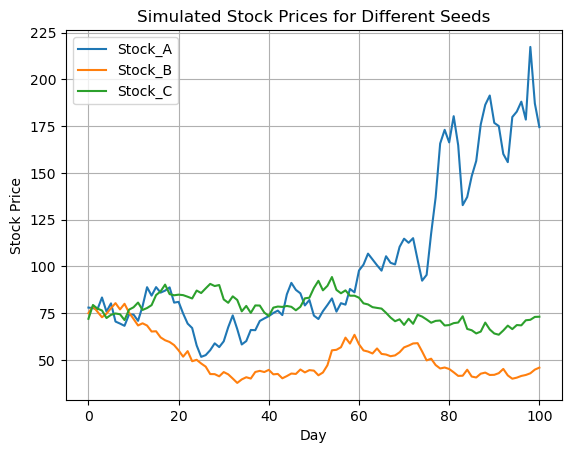

In [10]:
Stock_A = simulate_stock(78, 0.04, 1.2, 100)
Stock_B = simulate_stock(75, 0.08, 0.8, 100)
Stock_C = simulate_stock(72, 0.16, 0.6, 100)

np.random.seed(33)

plt.plot(Stock_A, label = "Stock_A")
plt.plot(Stock_B, label = "Stock_B")
plt.plot(Stock_C, label = "Stock_C")

plt.title('Simulated Stock Prices for Different Seeds')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)

plt.legend(loc='upper left')
plt.show()

## Part D: Monte Carlo Simulation

The process of performing several simulations to estimate 
probabilities relating to the outcome of a certain event is called Monte Carlo Simulatio, this is what we are going to be doing in the next cell..

In [11]:
np.random.seed(1)

def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for x in range(num_runs):
        sim_prices = simulate_stock(start, rate, vol, days)
        
        final_price = sim_prices[-1]
        final_prices.append(final_price)
        
        annual_yield = (final_price / start) ** (365 / days) - 1
        annual_yields.append(annual_yield)
        
    return np.array(final_prices), np.array(annual_yields)

I will now  test the function by running a Monte Carlo simulation with a 
specific seed. 

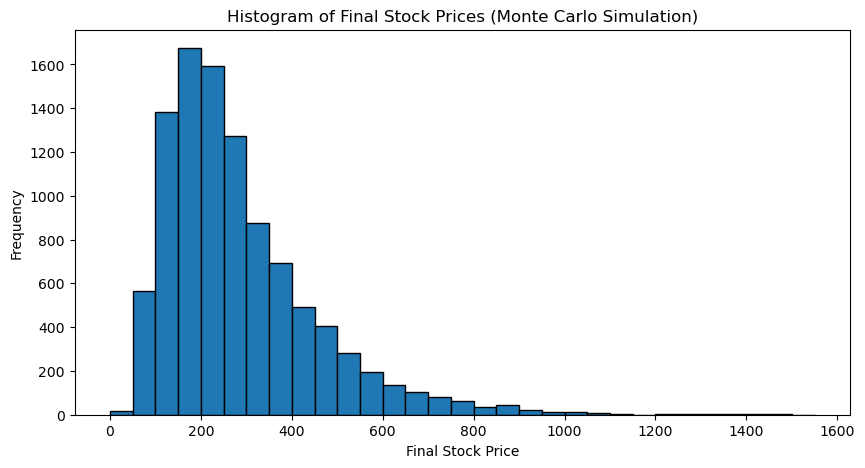

In [12]:
final_prices, annual_yields = monte_carlo(start = 200, rate = 0.10, vol=0.4, days=500, num_runs=10000)

plt.figure(figsize=[10, 5])
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')

plt.title('Histogram of Final Stock Prices (Monte Carlo Simulation)')
plt.xlabel('Final Stock Price')
plt.ylabel('Frequency')

plt.show()

I will now display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices. 

In [13]:
percentiles = [10, 25, 50, 75, 90]
percentile_values = np.percentile(final_prices, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

In this part, I will explore the effect of volatility on simulated stock prices. I will do this by performing two Monte Carlo 
simulations. The two simulations will use different volatilities, but will otherwise use the same  parameters.

In [14]:
np.random.seed(1)

expected_annual_return = 0.12
daily_rate = (1 + expected_annual_return) ** (1 / 365) - 1

final_prices_A, annual_yields_A = monte_carlo(start=100, rate=daily_rate, vol=0.3, days=150, num_runs=10000)
final_prices_B, annual_yields_B = monte_carlo(start=100, rate=daily_rate, vol=0.7, days=150, num_runs=10000)


avg_yield_A = np.mean(annual_yields_A)
avg_yield_B = np.mean(annual_yields_B)

print(f"Average Annual Yield for Stock A over 10000 runs: {avg_yield_A:.4f}")
print(f"Average Annual Yield for Stock B over 10000 runs: {avg_yield_B:.4f}")

Average Annual Yield for Stock A over 10000 runs: 0.1745
Average Annual Yield for Stock B over 10000 runs: 1.3477


I will visually inspect the results of the two Monte Carlo simulations by plotting 
histograms of the final prices. 

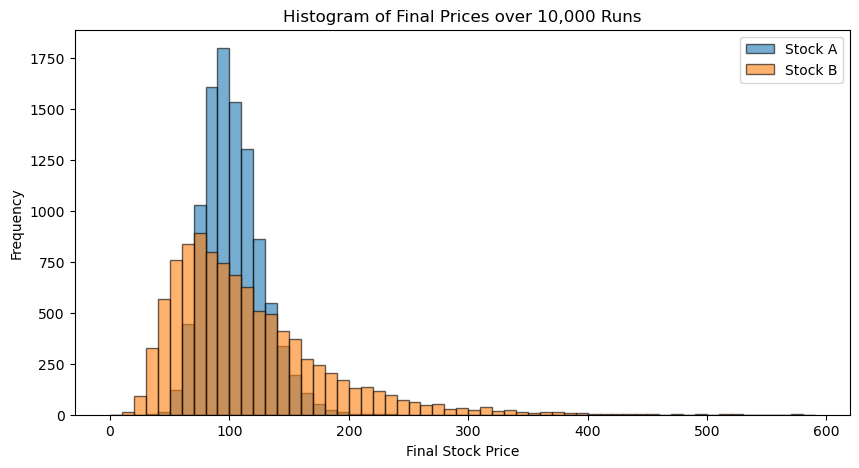

In [15]:
plt.figure(figsize=[10, 5])
plt.hist(final_prices_A, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label="Stock A")
plt.hist(final_prices_B, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label="Stock B")

plt.title("Histogram of Final Prices over 10,000 Runs")
plt.xlabel("Final Stock Price")
plt.ylabel("Frequency")

plt.legend()

plt.show()

## Part G: Expected Call Payoff

I will use Monte Carlo to estimate the expected payoff of a call on a particular stock. The stock will have a current price 
of 200, an expected annual yield of 11%, and a volatility of 0.4. The call will have a strike price o  225 and will expire in 15 
days. 

In [16]:
np.random.seed(1)


final_prices, _ = monte_carlo(start=200, rate=0.11, vol=0.4, days=150, num_runs=10000)

strike_price = 225

payoffs = np.where(final_prices > strike_price, final_prices - strike_price, 0)

average_payoff = np.mean(payoffs)

print(f"Average Call Payoff over 10,000 runs: ${average_payoff:.2f}")


Average Call Payoff over 10,000 runs: $27.10
